In [32]:
# Video link followed for this project. Thank you.
# https://www.youtube.com/watch?v=eMOA1pPVUc4&t=712s
# Credit: Keith Galli

In [33]:
# Import Necessary Libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
pwd()

'C:\\Users\\victo\\OneDrive\\Documentos\\Projects\\Sales_Analysis'

In [35]:
# Merge Datasets
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith(".")]

all_data = pd.DataFrame()

for file in files:
  df = pd.read_csv(path+"/"+file)
  all_data = pd.concat([all_data,df])

all_data.to_csv("all_data.csv", index=False)

In [36]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [37]:
# Load Merged Dataset
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [38]:
# Cleaning up Data
nans = all_data[all_data.isna().any(axis=1)]
display(nans.head())

all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [39]:
# Checking Data Types
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [40]:
# What was the best month for sales? How much was earned that month?

# Ensure 'Order Date' is in datetime format 
# all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], errors='coerce')


all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

### Task 1: Month

In [41]:
all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = all_data['Month'].astype('int')

In [42]:
# Checking Data Types
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Month             186305 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.4+ MB


In [43]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [44]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

In [45]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  186305 non-null  object 
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Month             186305 non-null  object 
dtypes: float64(1), object(6)
memory usage: 11.4+ MB


### Task 2: Revenue

In [46]:
# Ensure 'Quantity Ordered' and 'Price Each' are numeric
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'], errors='coerce')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Calculate 'Revenue'
all_data["Revenue"] = all_data['Quantity Ordered'] * all_data['Price Each']

In [47]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Month             186305 non-null  object 
 7   Revenue           185950 non-null  float64
dtypes: float64(3), object(5)
memory usage: 12.8+ MB


In [48]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Revenue
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


### **Question 1: What was the best month for sales? How much was earned that month?**

In [49]:
all_data.groupby("Month")["Revenue"].sum().sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
Or          0.00
Name: Revenue, dtype: float64

In [49]:
all_data.groupby("Month")["Revenue"].sum().sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
04    3390670.24
11    3199603.20
05    3152606.75
03    2807100.38
07    2647775.76
06    2577802.26
08    2244467.88
02    2202022.42
09    2097560.13
01    1822256.73
Or          0.00
Name: Revenue, dtype: float64

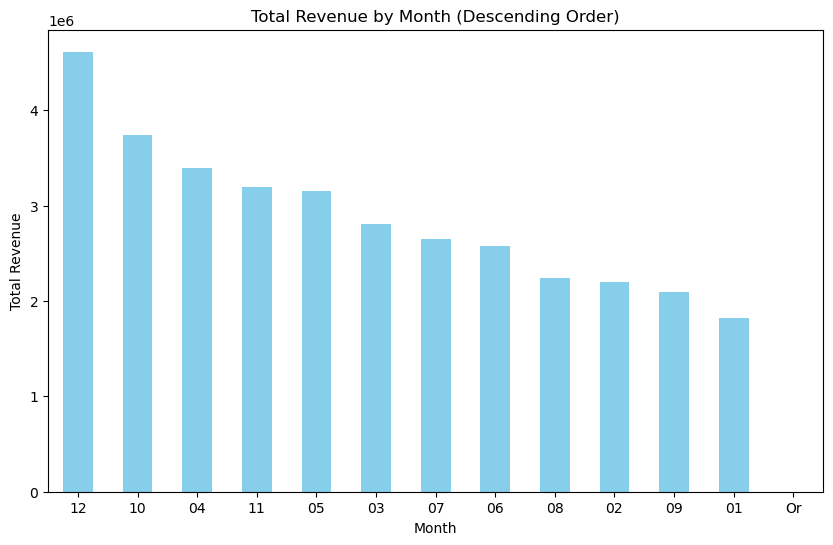

In [50]:
# Group by 'Month' and calculate the sum of 'Revenue' for each group
monthly_revenue = all_data.groupby("Month")["Revenue"].sum()

# Sort the resulting Series in descending order
monthly_revenue_sorted = monthly_revenue.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
monthly_revenue_sorted.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Month (Descending Order)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

### Answer: December
### 4,613,443.34
### It makes sense that December has the most number of sales.

### **Question 2: What city had the highest number of sales ?**

In [51]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Revenue'],
      dtype='object')

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          186305 non-null  object 
 1   Product           186305 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        186305 non-null  object 
 5   Purchase Address  186305 non-null  object 
 6   Month             186305 non-null  object 
 7   Revenue           185950 non-null  float64
dtypes: float64(3), object(5)
memory usage: 12.8+ MB


In [53]:
all_data['Purchase Address'].astype('str')

0                    917 1st St, Dallas, TX 75001
2               682 Chestnut St, Boston, MA 02215
3            669 Spruce St, Los Angeles, CA 90001
4            669 Spruce St, Los Angeles, CA 90001
5               333 8th St, Los Angeles, CA 90001
                           ...                   
186845     840 Highland St, Los Angeles, CA 90001
186846    216 Dogwood St, San Francisco, CA 94016
186847       220 12th St, San Francisco, CA 94016
186848     511 Forest St, San Francisco, CA 94016
186849     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 186305, dtype: object

In [54]:
all_data['Purchase Address'].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

In [56]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1] if pd.notnull(x) and len(x.split(',')) > 1 else None)
all_data.head()

In [59]:
all_data.groupby('City')['Revenue'].sum().sort_values(ascending=False)

City
 San Francisco    8262203.91
 Los Angeles      5452570.80
 New York City    4664317.43
 Boston           3661642.01
 Atlanta          2795498.58
 Dallas           2767975.40
 Seattle          2747755.48
 Portland         2320490.61
 Austin           1819581.75
Name: Revenue, dtype: float64

### Answer: San Francisco

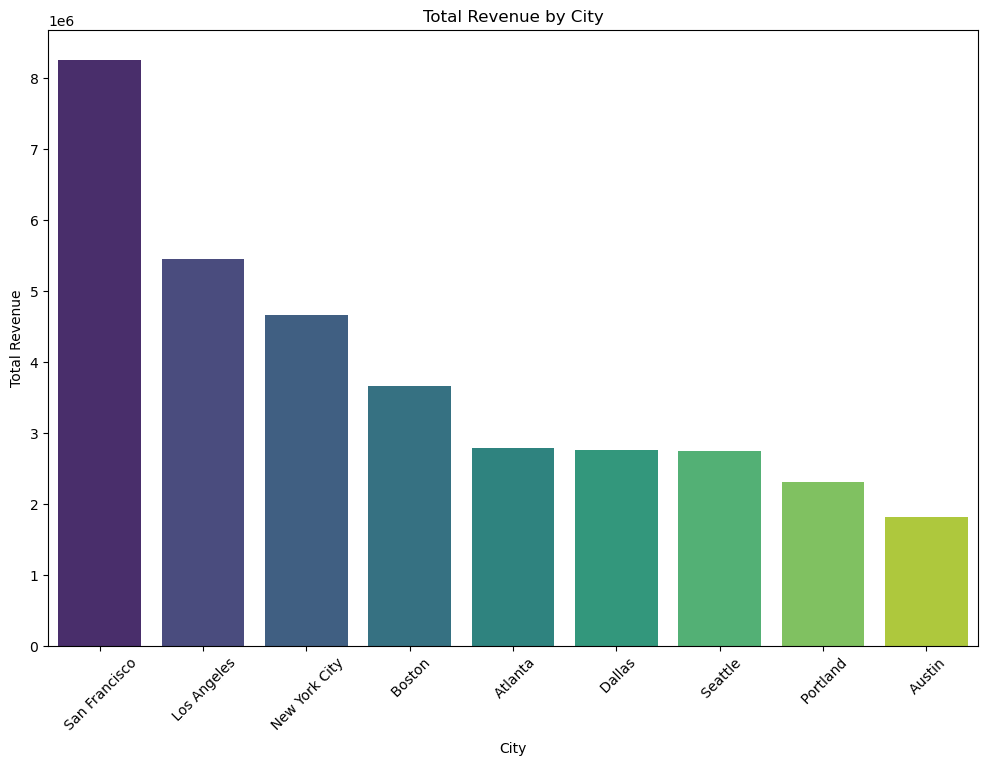

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by city and calculate the sum of revenue, then sort the values
city_revenue = all_data.groupby('City')['Revenue'].sum().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=city_revenue.index, y=city_revenue.values, palette="viridis")

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by City')
plt.xticks(rotation=45)  # Rotate city names for better readability

# Display the plot
plt.show()


# **Continue tomorrow!!**